# Midterm report: Heart disease
Shuangyi Tan s1889983

Shuangyi Tan's dataset is about heart disease. And it came from [Kaggle](https://www.kaggle.com/dileep070/heart-disease-prediction-using-logistic-regression/kernels).

The source dataset is publicly available on the Kaggle website from an ongoing cardiovascular study of residents of Framingham, Massachusetts. The purpose of the classification is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD).[[1]](https://www.kaggle.com/dileep070/heart-disease-prediction-using-logistic-regression)

## Data processing and analysis

### 1. import librarys and supress Warnings


In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tools import add_constant as add_constant

### 2. Read the data, drop some information, rename columns

In [3]:
heart_df=pd.read_csv("framingham_heart_disease.csv")
heart_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
heart_df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


From above, we could see that the original dataset has 14 variables, 2 classes and 4238 samples.
From original dataset description, we have: 

**Demographic:**

Sex: male or female(Nominal)

Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**Behavioral:**

Current Smoker: whether or not the patient is a current smoker (Nominal)

Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.) 

**Medical(history):**

BP Meds: whether or not the patient was on blood pressure medication (Nominal)

Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal) 

Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

Diabetes: whether or not the patient had diabetes (Nominal)

Tot Chol: total cholesterol level (Continuous) 

Sys BP: systolic blood pressure (Continuous) 

Dia BP: diastolic blood pressure (Continuous)

BMI: Body Mass Index (Continuous) 

Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.) 

Glucose: glucose level (Continuous) Predict variable (desired target) 

**Class:**

10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [5]:
heart_df.drop(['education'],axis=1,inplace=True)
heart_df.rename(columns={'male':'Sex_male'},inplace=True)

From basic information, we could know education has nearly no relationship with heart disease. so we drop it here.
### 3. Handle the missing values

In [6]:
count=0
for i in heart_df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('since it is only',round((count/len(heart_df.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')
heart_df.dropna(axis=0,inplace=True)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
heart_df.describe()

Total number of rows with missing values is  489
since it is only 12 percent of the entire dataset the rows with missing values are excluded.


,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,0.445185,49.578821,0.488397,9.005335,0.030408,0.005601,0.311816,0.027207,236.952787,132.365964,82.933716,25.809651,75.703921,81.883169,0.152574
std,0.497053,8.569322,0.499932,11.922440,0.171730,0.074643,0.463297,0.162709,44.610417,22.051951,11.933321,4.065894,11.957763,23.888039,0.359624
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.090000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


Firstly, we check the proportion of missing values and find that total number of rows with missing values is 489, which is 12 percent of entire dataset.

As a result, here we do the complete analysis for the dataset, which means that we drop all samples with missing values.

Then we will have a dataset with values all observed. The new dataset has 3749 samples. 

### 4. Add a constant

Here we add a constant for each sample, which make things more convenient for using several models.

In [7]:
heart_df_constant = add_constant(heart_df)
heart_df_constant.head()

,const,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1.0,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1.0,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1.0,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### 5. Choose relative features we need to use

In [8]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols = heart_df_constant.columns[:-1]
model = sm.Logit(heart_df.TenYearCHD,heart_df_constant[cols])
result = model.fit()
print(result.summary())

# Define back_feature_selection
def back_feature_elem (data_frame,dep_var,col_list):
    while len(col_list)>0 :
        model = sm.Logit(dep_var,data_frame[col_list])
        result = model.fit(disp=0)
        largest_pvalue = round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

# Use back_feature_selection to select features, if p > 0.05, we delete the feature
result=back_feature_elem(heart_df_constant,heart_df.TenYearCHD,cols)

#Interpreting the results: Odds Ratio, Confidence Intervals and Pvalues
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print (conf)

new_features=heart_df[['age','Sex_male','cigsPerDay','totChol','sysBP','glucose','TenYearCHD']]

Optimization terminated successfully.
         Current function value: 0.377199
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3749
Model:                          Logit   Df Residuals:                     3734
Method:                           MLE   Df Model:                           14
Date:                Sat, 08 Feb 2020   Pseudo R-squ.:                  0.1169
Time:                        16:43:10   Log-Likelihood:                -1414.1
converged:                       True   LL-Null:                       -1601.4
Covariance Type:            nonrobust   LLR p-value:                 2.922e-71
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.6463      0.687    -12.577      0.000      -9.994      -7.299
Sex_male      

Feature Selection: Backward elemination (P-value approach)

Here we use backward elemination to select relative features. 

Statistically speaking, if some attributes have the P values are higher than the preferred alpha (5%), there is a very low statistically significant relationship between these attributes and the probability of heart disease.

The backward elimination method is used to delete those attributes with the highest P value at a time, and then run the learning repeatedly until the P values of all the attributes are less than 0.05.

So finally we choose 'age','Sex_male','cigsPerDay','totChol','sysBP' and 'glucose' these six features which are most relative to the heart disease due to the low p-values. We use these six features and the class variable to form a new dataset named 'new_features' here.

### 6. Plot basis features of new dataset

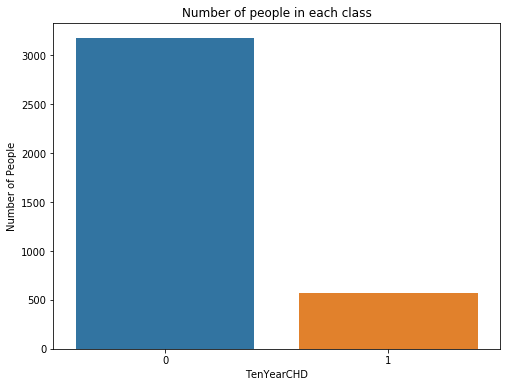


0    3177
1     572
Name: TenYearCHD, dtype: int64



In [9]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.countplot(x='TenYearCHD',data=new_features)
plt.title('Number of people in each class')
plt.ylabel('Number of People')
plt.savefig('Class.png')
plt.show()

print()
count = new_features.TenYearCHD.value_counts()
print(count)
print()

Firstly, from what is stated above, there are 2 classes. 0 shows that the participant has no has 10-year risk of future coronary heart disease(CHD) and 1 otherwise. From the result above, we could see that the dataset is extremely unbalanced.

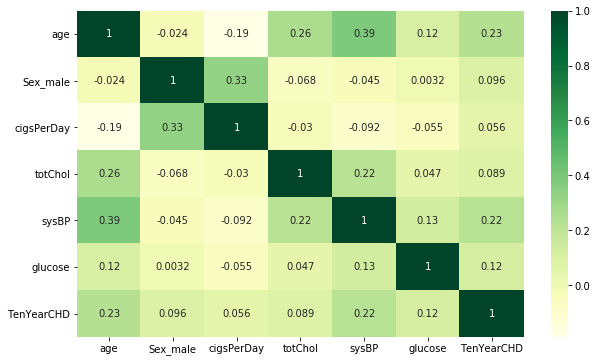

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(new_features.corr(),cmap='YlGn',annot=True)
plt.savefig('Corr.png')
plt.show()

From the graph above, we could see that the correlation between features are small, which means that the features we choose here describe the dataset to the utmost extent.

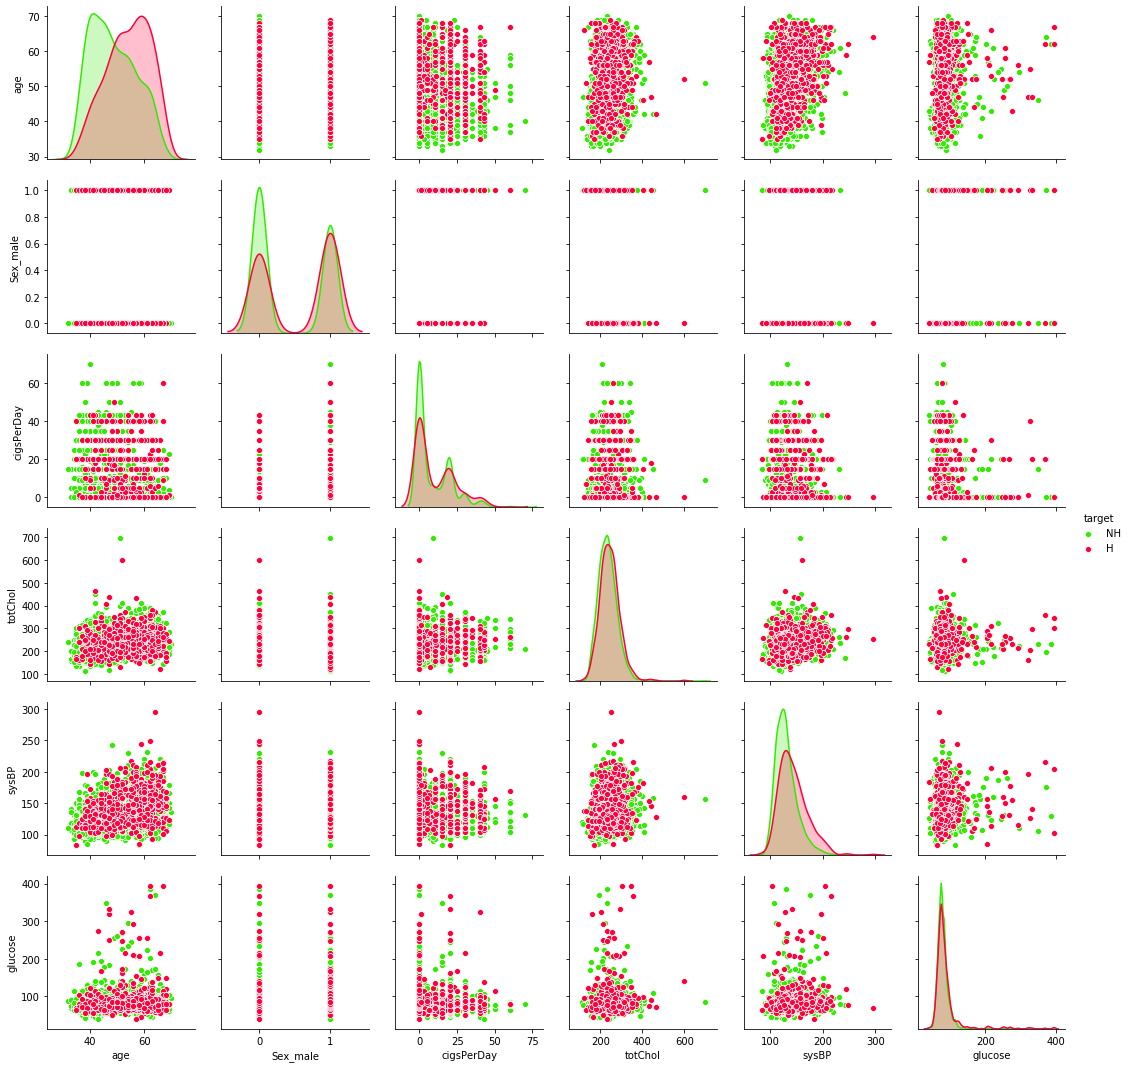

In [11]:
# Plot out the distribution, which will take a long time
y_target = new_features['TenYearCHD']
new_features['target'] = new_features['TenYearCHD'].map({0:'NH',1:'H'})
g = sns.pairplot(new_features.drop('TenYearCHD', axis = 1), hue="target", palette='prism');
plt.savefig('Distribution.png')
plt.show()

From the pairplot above, we could see that the data is very mixed in every dimension. That is, the problem here is a complex problem, which means that the classifier can't easily reach a high accuracy.

### 7. Split training data and testing data

In [12]:
new_features=heart_df[['age','Sex_male','cigsPerDay','totChol','sysBP','glucose','TenYearCHD']]
x = new_features.iloc[:,:-1]
y = new_features.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=5)

This module is aiming to generate 2 sets, one for testing and another for training. The proposition here we use is training set : testing set = 4:1.

### 8. Training different classifier and test result analysis

Firstly we focus on the random guess classifier, which also will be a baseline.

The AUROC of random guess will be 0.5 and the AUPRC of it should be $\frac{572}{3177+572} \approx 0.15257$.

In [21]:
# Create a list to show the Acc, AUROC and AUPRC for different classifiers
table = pd.DataFrame(index=["Logistic Regression","SVM","KNN","Naive Bayes","Desicion Tree","Random Forest"], columns=["AUROC", "AUPRC", "ACC", "log_loss", "F1"])

# Fit the model and predict y with it
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
log_y_score = logreg.fit(x_train, y_train).decision_function(x_test)
log_y_pred = logreg.predict(x_test)

from sklearn import svm
SvM = svm.SVC()
SVM_y_score = SvM.fit(x_train, y_train).decision_function(x_test)
SVM_y_pred = SvM.predict(x_test)

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)
KNN_y_score = neigh.fit(x_train, y_train).predict_proba(x_test)[:, 1]
KNN_y_pred = neigh.predict(x_test)

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
NB_y_score = gnb.fit(x_train, y_train).predict_proba(x_test)[:, 1]
NB_y_pred = gnb.predict(x_test)

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
DT_y_score = dt.fit(x_train, y_train).predict_proba(x_test)[:, 1]
DT_y_pred = dt.predict(x_test)


from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF_y_score = rf.fit(x_train, y_train).predict_proba(x_test)[:, 1]
RF_y_pred = rf.predict(x_test)


# AUROC
from sklearn.metrics import roc_auc_score
log_AUROC = roc_auc_score(y_test,log_y_score)
table.values[0][0] = log_AUROC

SVM_AUROC = roc_auc_score(y_test,SVM_y_score)
table.values[1][0] = SVM_AUROC

KNN_AUROC = roc_auc_score(y_test,KNN_y_score)
table.values[2][0] = KNN_AUROC

NB_AUROC = roc_auc_score(y_test,NB_y_score)
table.values[3][0] = NB_AUROC

DT_AUROC = roc_auc_score(y_test,DT_y_score)
table.values[4][0] = DT_AUROC

RF_AUROC = roc_auc_score(y_test,RF_y_score)
table.values[5][0] = RF_AUROC


# AUPRC

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

def AUPRC(y_test,y_pred_proba):
    precision, recall, thresholds = precision_recall_curve(y_test,y_pred_proba)
    auprc = auc(recall, precision)
    return auprc

log_AUPRC = AUPRC(y_test,log_y_score)
table.values[0][1] = log_AUPRC
SVM_AUPRC = AUPRC(y_test,SVM_y_score)
table.values[1][1] = SVM_AUPRC
KNN_AUPRC = AUPRC(y_test,KNN_y_score)
table.values[2][1] = KNN_AUPRC
NB_AUPRC = AUPRC(y_test,NB_y_score)
table.values[3][1] = NB_AUPRC
DT_AUPRC = AUPRC(y_test,DT_y_score)
table.values[4][1] = DT_AUPRC
RF_AUPRC = AUPRC(y_test,RF_y_score)
table.values[5][1] = RF_AUPRC


# Model accuracy
from sklearn.metrics import accuracy_score
log_Acc = accuracy_score(y_test, log_y_pred)
table.values[0][2] = log_Acc
SVM_Acc = accuracy_score(y_test, SVM_y_pred)
table.values[1][2] = SVM_Acc
KNN_Acc = accuracy_score(y_test, KNN_y_pred)
table.values[2][2] = KNN_Acc
NB_Acc = accuracy_score(y_test, NB_y_pred)
table.values[3][2] = NB_Acc
DT_Acc = accuracy_score(y_test, DT_y_pred)
table.values[4][2] = DT_Acc
RF_Acc = accuracy_score(y_test, RF_y_pred)
table.values[5][2] = RF_Acc

#neg_log loss
from sklearn.metrics import log_loss
log_neg_log = log_loss(y_test, log_y_pred)
table.values[0][3] = log_neg_log
SVM_neg_log = log_loss(y_test, SVM_y_pred)
table.values[1][3] = SVM_neg_log
KNN_neg_log = log_loss(y_test, KNN_y_pred)
table.values[2][3] = KNN_neg_log
NB_neg_log = log_loss(y_test, NB_y_pred)
table.values[3][3] = NB_neg_log
DT_neg_log = log_loss(y_test, DT_y_pred)
table.values[4][3] = DT_neg_log
RF_neg_log = log_loss(y_test, RF_y_pred)
table.values[5][3] = RF_neg_log

#F1
from sklearn.metrics import f1_score
log_f1 = f1_score(y_test, log_y_pred, average='weighted')
table.values[0][4] = log_f1
SVM_f1 = f1_score(y_test, SVM_y_pred, average='weighted')
table.values[1][4] = SVM_f1
KNN_f1 = f1_score(y_test, KNN_y_pred, average='weighted')
table.values[2][4] = KNN_f1
NB_f1 = f1_score(y_test, NB_y_pred, average='weighted')
table.values[3][4] = NB_f1
DT_f1 = f1_score(y_test, DT_y_pred, average='weighted')
table.values[4][4] = DT_f1
RF_f1 = f1_score(y_test, RF_y_pred, average='weighted')
table.values[5][4] = RF_f1

# Show the conclu table
print(table.head(7))

                        AUROC     AUPRC       ACC log_loss        F1
Logistic Regression  0.768746   0.40626  0.866667  4.60517  0.810866
SVM                   0.59786  0.159508  0.862667  4.74333  0.799063
KNN                   0.66192  0.225833  0.857333  4.92754  0.809676
Naive Bayes          0.776121  0.386426  0.861333   4.7894  0.834652
Desicion Tree        0.532052  0.256254     0.756  8.42757  0.766046
Random Forest        0.759758  0.355428  0.862667  4.74333  0.799063


Here we choose Logistic regression, Support Vector Machine, KNN, Naive Bayes, Decision Tree and Random Forest these 6 classifiers for experiments. Also, we choose AUROC, AUPRC, accuracy, log loss and F1 score as measurements.

The first one is Logistic regression, here we use built-in preset parameters for the classifier. The ROC and PRC are shown below.

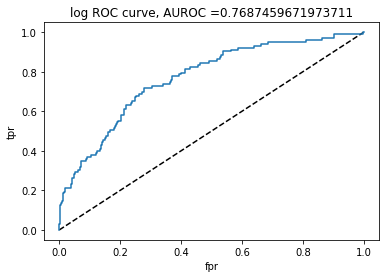

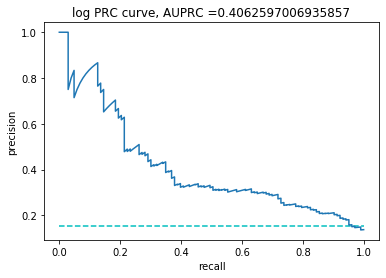

In [14]:
from sklearn.metrics import roc_curve
y_pred_proba = log_y_score ###############
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
#Area under ROC curve
from sklearn.metrics import roc_auc_score
auroc = roc_auc_score(y_test,y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='log') ##############
plt.xlabel('fpr')
plt.ylabel('tpr')
title_name = 'log ROC curve, AUROC ='+str(auroc) ############
plt.title(title_name)
plt.savefig('log ROC curve.png') ####################
plt.show()

precision, recall, thresholds = precision_recall_curve(y_test,y_pred_proba)

auprc = auc(recall, precision)
plt.hlines(572/(3177+572), 0, 1, colors = "c", linestyles = "dashed")
plt.plot(recall,precision, label='log') ####################
plt.xlabel('recall')
plt.ylabel('precision')
title_name = 'log PRC curve, AUPRC ='+str(auprc) ###############
plt.title(title_name)
plt.savefig('log PRC curve.png') #######################
plt.show()

The second one is Support Vector Machine, here we use built-in preset parameters for the classifier. The ROC and PRC are shown below.

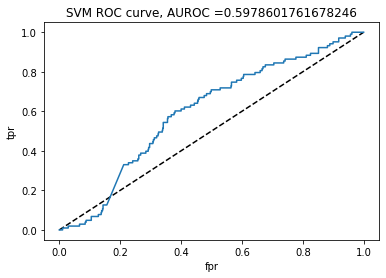

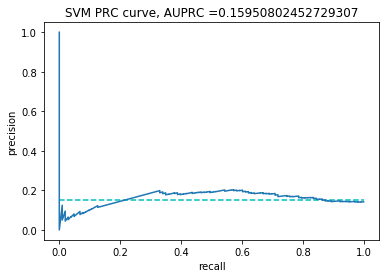

In [15]:
from sklearn.metrics import roc_curve
y_pred_proba = SVM_y_score ###############
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
#Area under ROC curve
from sklearn.metrics import roc_auc_score
auroc = roc_auc_score(y_test,y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='SVM') ##############
plt.xlabel('fpr')
plt.ylabel('tpr')
title_name = 'SVM ROC curve, AUROC ='+str(auroc) ############
plt.title(title_name)
plt.savefig('SVM ROC curve.png') ####################
plt.show()

precision, recall, thresholds = precision_recall_curve(y_test,y_pred_proba)

auprc = auc(recall, precision)
plt.hlines(572/(3177+572), 0, 1, colors = "c", linestyles = "dashed")
plt.plot(recall,precision, label='SVM') ####################
plt.xlabel('recall')
plt.ylabel('precision')
title_name = 'SVM PRC curve, AUPRC ='+str(auprc) ###############
plt.title(title_name)
plt.savefig('SVM PRC curve.png') #######################
plt.show()

The third one is KNN(K = 10), here for other parameters we use built-in preset ones for the classifier. The ROC and PRC are shown below.

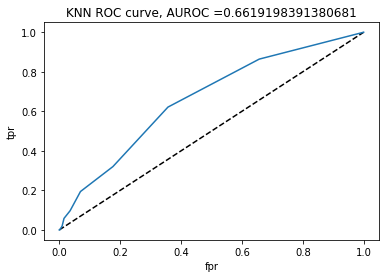

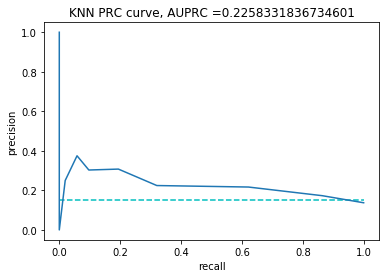

In [16]:
from sklearn.metrics import roc_curve
y_pred_proba = KNN_y_score ###############
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
#Area under ROC curve
from sklearn.metrics import roc_auc_score
auroc = roc_auc_score(y_test,y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='KNN') ##############
plt.xlabel('fpr')
plt.ylabel('tpr')
title_name = 'KNN ROC curve, AUROC ='+str(auroc) ############
plt.title(title_name)
plt.savefig('KNN ROC curve.png') ####################
plt.show()

precision, recall, thresholds = precision_recall_curve(y_test,y_pred_proba)

auprc = auc(recall, precision)
plt.hlines(572/(3177+572), 0, 1, colors = "c", linestyles = "dashed")
plt.plot(recall,precision, label='KNN') ####################
plt.xlabel('recall')
plt.ylabel('precision')
title_name = 'KNN PRC curve, AUPRC ='+str(auprc) ###############
plt.title(title_name)
plt.savefig('KNN PRC curve.png') #######################
plt.show()

The fourth one is Naive Bayes, here we use built-in preset parameters for the classifier. The ROC and PRC are shown below.

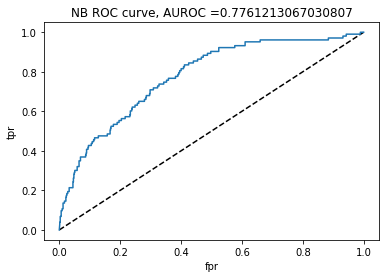

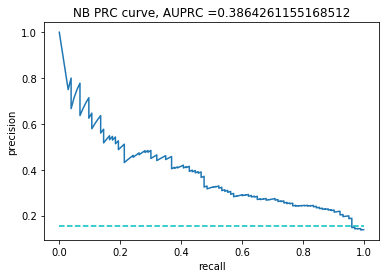

In [17]:
from sklearn.metrics import roc_curve
y_pred_proba = NB_y_score ###############
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
#Area under ROC curve
from sklearn.metrics import roc_auc_score
auroc = roc_auc_score(y_test,y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='NB') ##############
plt.xlabel('fpr')
plt.ylabel('tpr')
title_name = 'NB ROC curve, AUROC ='+str(auroc) ############
plt.title(title_name)
plt.savefig('NB ROC curve.png') ####################
plt.show()

precision, recall, thresholds = precision_recall_curve(y_test,y_pred_proba)

auprc = auc(recall, precision)
plt.hlines(572/(3177+572), 0, 1, colors = "c", linestyles = "dashed")
plt.plot(recall,precision, label='NB') ####################
plt.xlabel('recall')
plt.ylabel('precision')
title_name = 'NB PRC curve, AUPRC ='+str(auprc) ###############
plt.title(title_name)
plt.savefig('NB PRC curve.png') #######################
plt.show()

The fifth one is Decision Tree, here we use built-in preset parameters for the classifier. The ROC and PRC are shown below.

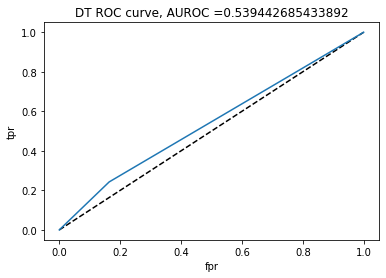

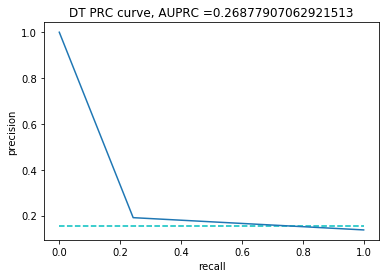

In [18]:
from sklearn.metrics import roc_curve
y_pred_proba = DT_y_score ###############
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
#Area under ROC curve
from sklearn.metrics import roc_auc_score
auroc = roc_auc_score(y_test,y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='DT') ##############
plt.xlabel('fpr')
plt.ylabel('tpr')
title_name = 'DT ROC curve, AUROC ='+str(auroc) ############
plt.title(title_name)
plt.savefig('DT ROC curve.png') ####################
plt.show()

precision, recall, thresholds = precision_recall_curve(y_test,y_pred_proba)

auprc = auc(recall, precision)
plt.hlines(572/(3177+572), 0, 1, colors = "c", linestyles = "dashed")
plt.plot(recall,precision, label='DT') ####################
plt.xlabel('recall')
plt.ylabel('precision')
title_name = 'DT PRC curve, AUPRC ='+str(auprc) ###############
plt.title(title_name)
plt.savefig('DT PRC curve.png') #######################
plt.show()

The sixth one is Random Forest with n_estimators=100, max_depth=2,and random_state=0. The ROC and PRC are shown below.

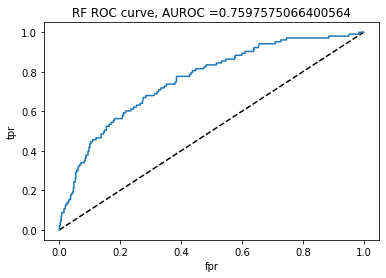

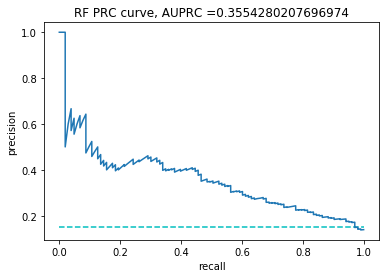

In [19]:
from sklearn.metrics import roc_curve
y_pred_proba = RF_y_score ###############
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
#Area under ROC curve
from sklearn.metrics import roc_auc_score
auroc = roc_auc_score(y_test,y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='RF') ##############
plt.xlabel('fpr')
plt.ylabel('tpr')
title_name = 'RF ROC curve, AUROC ='+str(auroc) ############
plt.title(title_name)
plt.savefig('RF ROC curve.png') ####################
plt.show()

precision, recall, thresholds = precision_recall_curve(y_test,y_pred_proba)

auprc = auc(recall, precision)
plt.hlines(572/(3177+572), 0, 1, colors = "c", linestyles = "dashed")
plt.plot(recall,precision, label='RF') ####################
plt.xlabel('recall')
plt.ylabel('precision')
title_name = 'RF PRC curve, AUPRC ='+str(auprc) ###############
plt.title(title_name)
plt.savefig('RF PRC curve.png') #######################
plt.show()

**Overall analysis**:

From the table above, we could see that all the classifier we use here have higher accuracy than random guess.

As for which classifier is better, AUROC votes for:

Naive Bayes $\approx$ Logistic Regression > Random Forest >> KNN > SVM > Decision Tree.

AUPRC votes for:

Logistic Regression > Naive Bayes > Random Forest >> Decision Tree > KNN > SVM.

Accuracy votes for:

Logistic Regression $\approx$ SVM = Random Forest > Naive Bayes > KNN > Decision Tree.

Log_loss votes for:

Logistic Regression > SVM = Random Forest > Naive Bayes > KNN >> Decision Tree.

F1 score votes for:

Naive Bayes > Logistic Regression > KNN > SVM > Random Forest = Decision Tree.

For the majority vote, Logistic regression is the best classifier and Naive Bayes is the second best. Among these measurements, AUPRC seems has a similar pattern to the result achieved by the majority vote. However, from the majority vote, we also could see that the performance of  Decision Tree is the worst and the performance of KNN is the second worst. For this situation, AUROC gives out the similar result. As for accuracy and F1 score, there is one more thing we need to mention. That is, the accuracy or F1 score of different classifier have no significant difference, which means they are not suitable for measuring performance of classifier for this dataset.

For the graphs above, we could see that PRC works well for "good" classifier (which means that the classifier works well), but for "bad" ones, the curve becomes unstable. At the same time, ROC shows similarly for "good" ones but clearly expresses the poor performance of those "bad" classifier.

So for this dataset, AUPRC should be a better measurement for evaluate the performance of "good" classifier than AUROC, while AUROC works well for evaluate the performance of "bad" classifier. They both works much better than accuracy and F1 score. As for log_loss, the result it gives out seems quite different from the majority vote, especially for the the Naive Bayes and SVM. To reach a conclusion, AUPRC and AUROC should be used together for choosing classifiers. That is, AUPRC should be use to evaluate which classifier is accurate, while AUROC should be used to measure how inaccurate a classifier is.

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

LR : AUROC = 0.769, AUPRC = 0.406,  . 
Accuracy = 0.867, log loss = 4.605,
------------------------------------------------------------
KNN : AUROC = 0.639, AUPRC = 0.210,  . 
Accuracy = 0.841, log loss = 5.480,
------------------------------------------------------------
NB : AUROC = 0.776, AUPRC = 0.386,  . 
Accuracy = 0.861, log loss = 4.789,
------------------------------------------------------------
RF : AUROC = 0.609, AUPRC = 0.224,  . 
Accuracy = 0.849, log loss = 5.204,
------------------------------------------------------------
DecisionTree : AUROC = 0.536, AUPRC = 0.263,  . 
Accuracy = 0.756, log loss = 8.428,
------------------------------------------------------------
SVM : AUROC = 0.598, AUPRC = 0.160,  . 
Accuracy = 0.863, log loss = 4.743,
------------------------------------------------------------


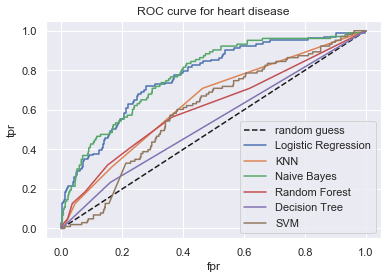

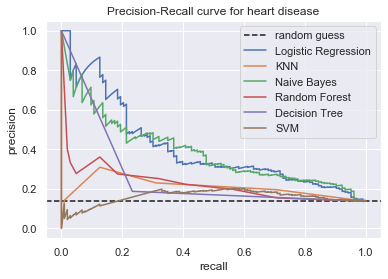

In [28]:
from sklearn.metrics import roc_auc_score, average_precision_score, f1_score, log_loss, recall_score, precision_recall_curve, auc
from sklearn.metrics import roc_curve, accuracy_score
import seaborn as sns
%matplotlib inline
sns.set()

X_train = x_train
X_test = x_test


seed=7
models = [] # Here I will append all the algorithms that I will use. Each one will run in all the created datasets.
models.append(('LR', LogisticRegression())) 
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('DecisionTree', DecisionTreeClassifier(random_state=42)))
models.append(('SVM',SVC(random_state=42,probability=True)))

test_ratio = y_test.sum()/len(y_test)
# compare different classifiers
results_accuracy=[]
results_auroc=[]
results_average_precision=[]
results_neg_log_loss=[]
results_f1 = []
results_recall =[]
names=[]
fpr_full = []
tpr_full = []
thresholds_roc_full = []
precision_full = []
recall_full = []
thresholds_prc_full = []
measures = ['AUROC','AUPRC','accuracy','log loss','F1']
scores_table = np.zeros([8,5])
roc_cut = np.zeros([8,]).astype(int) # cut points for fpr, tpr, thresholds for ROC curve of each model
prc_cut = np.zeros([8,]).astype(int) # cut points for precision, recall, thresholds for PRC curve of each model
i = 0 # looping index
for name, model in models:
        y_pred_proba = model.fit(X_train, y_train).predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        fpr_full = np.concatenate((fpr_full, fpr))
        tpr_full = np.concatenate((tpr_full, tpr))
        thresholds_roc_full = np.concatenate((thresholds_roc_full, thresholds))
        roc_cut[i + 1] = roc_cut[i] + fpr.shape[0]
        #Area under ROC curve
        auroc = roc_auc_score(y_test,y_pred_proba)
        precision, recall, thresholds = precision_recall_curve(y_test,y_pred_proba)
        precision_full = np.concatenate((precision_full, precision))
        recall_full = np.concatenate((recall_full, recall))
        thresholds_prc_full = np.concatenate((thresholds_prc_full, thresholds))
        prc_cut[i + 1] = prc_cut[i] + recall.shape[0]
        # area under PRC curve
        auprc = auc(recall, precision)

        accuracy = accuracy_score(y_test, model.predict(X_test))
        average_precision = average_precision_score(y_test, model.predict(X_test))
        f1 = f1_score(y_test, model.predict(X_test))
        log_loss_score = log_loss(y_test, model.predict(X_test))
        recall = recall_score(y_test, model.predict(X_test))
        names.append(name)


        # report of scores
        scores_table[i, 0] = auroc
        scores_table[i, 1] = auprc
        scores_table[i, 2] = accuracy
        scores_table[i, 3] = log_loss_score
        scores_table[i, 4] = f1

        print(name,': AUROC = {:.3f}, AUPRC = {:.3f}, '.format(auroc,auprc),
              '. \nAccuracy = {:.3f}, log loss = {:.3f},'.format(accuracy, log_loss_score))
        print ("--"*30)
        i = i + 1

scores_table[5, 0] = 0.5 # random guess
scores_table[5, 1] = test_ratio # random guess  

#plot ROC
plt.plot([0,1],[0,1],'k--')
for i in range(7):
    plt.plot(fpr_full[roc_cut[i]:roc_cut[i + 1]],tpr_full[roc_cut[i]:roc_cut[i + 1]], label=name)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.rcParams["figure.figsize"] = (8,5)
plt.title(title_name)
plt.legend(['random guess','Logistic Regression','KNN','Naive Bayes','Random Forest','Decision Tree','SVM'])
save_name = 'heart disease_ROC_curve_new.png'
plt.savefig(save_name)
plt.show()

# plot PRC
plt.axhline(y=test_ratio, xmin=0, xmax=1,color='k', linestyle = '--')
for i in range(7):
    plt.plot(recall_full[prc_cut[i]:prc_cut[i + 1]],precision_full[prc_cut[i]:prc_cut[i + 1]], label=name)
plt.rcParams["figure.figsize"] = (8,5)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(title_name)
plt.legend(['random guess','Logistic Regression','KNN','Naive Bayes','Random Forest','Decision Tree','SVM'])
save_name = 'heart disease_PRcurve_new.png'
plt.savefig(save_name)
plt.show()
